In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
#Load datasdet
data = pd.read_csv('global_disaster.csv')
data.head(5)

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,2020-08-10,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,2022-09-28,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


In [5]:
# Cleaning dataset
data = data.dropna()
data.isnull().sum()

date                         0
country                      0
disaster_type                0
severity_index               0
casualties                   0
economic_loss_usd            0
response_time_hours          0
aid_amount_usd               0
response_efficiency_score    0
recovery_days                0
latitude                     0
longitude                    0
dtype: int64

In [17]:
data.duplicated().sum()

np.int64(0)

In [21]:
# Tahap Exploratory Data Analysis (EDA)
data.describe()
# pisahkan tanggal jadi Tahunnya aja
data['year'] = pd.to_datetime(data['date']).dt.year
data.head(5)


,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude,year
0,2021-01-31,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557,2021
1,2018-12-23,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194,2018
2,2020-08-10,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978,2020
3,2022-09-15,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350,2022
4,2022-09-28,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137,2022


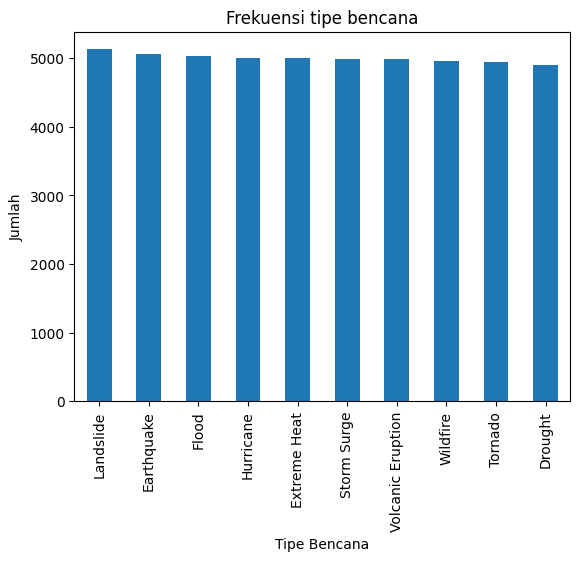

In [22]:
data['disaster_type'].value_counts().plot(kind='bar')
plt.title('Frekuensi tipe bencana')
plt.xlabel('Tipe Bencana')
plt.ylabel('Jumlah')
plt.show()

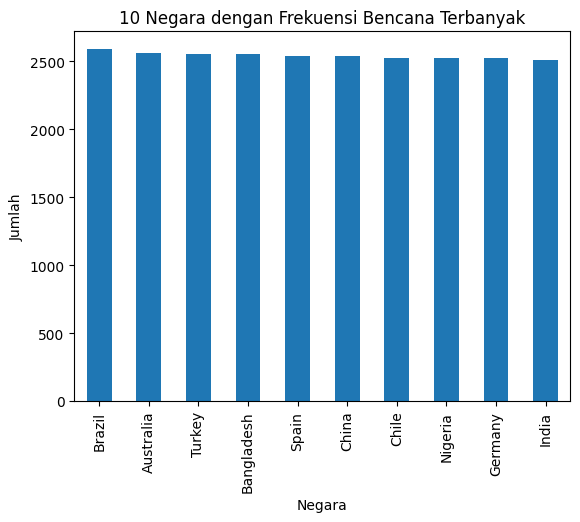

In [23]:
# Visulisasi data Negara mana yang sering terkena benc
data['country'].value_counts().head(10).plot(kind='bar')
plt.title('10 Negara dengan Frekuensi Bencana Terbanyak')
plt.xlabel('Negara')
plt.ylabel('Jumlah')
plt.show()

Text(0.5, 0, 'Negara')

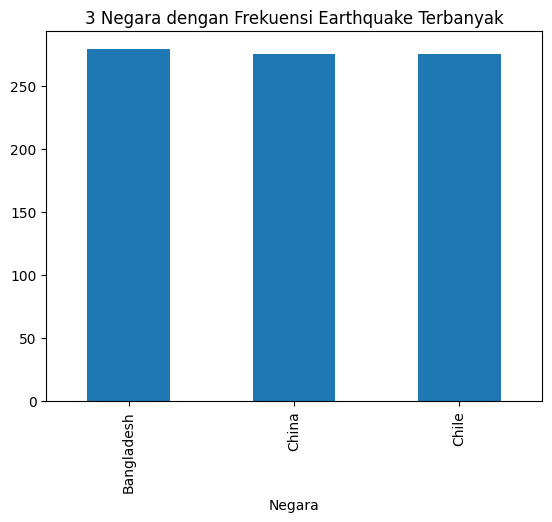

In [24]:
# Frequensi Earthquake lebih sering terjadi di negara apa aja
earthquake_data = data[data['disaster_type'] == 'Earthquake']
earthquake_data['country'].value_counts().head(3).plot(kind='bar')
plt.title('3 Negara dengan Frekuensi Earthquake Terbanyak')
plt.xlabel('Negara')

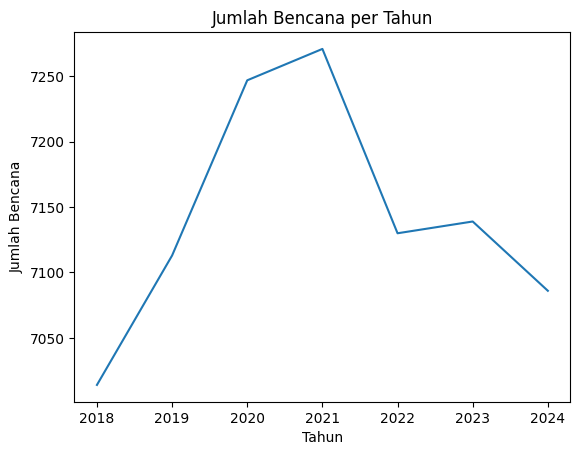

In [25]:
data.groupby('year')['disaster_type'].count().plot(kind='line')
plt.title('Jumlah Bencana per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Bencana')
plt.show()

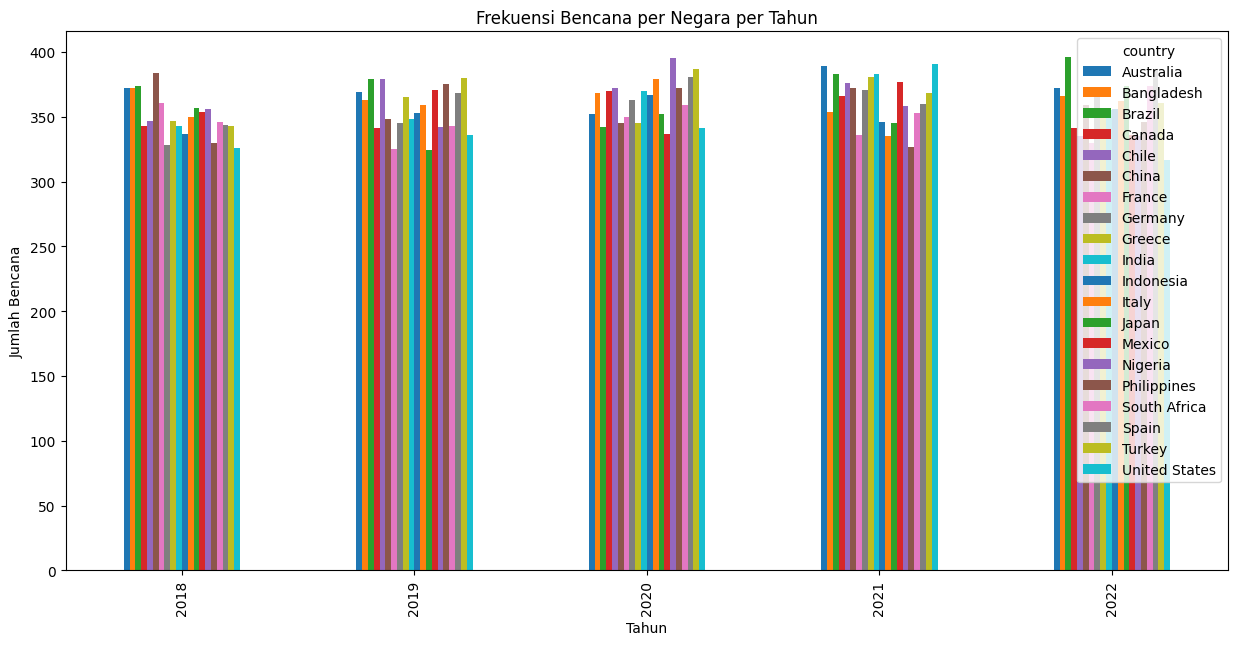

In [ ]:
# Visualisasi Negara dengan frekuensi bencana terbanyak per tahun
data.groupby(['year', 'country'])['disaster_type'].count().unstack().head(5).fillna(0).plot(kind='bar', figsize=(15,7))
plt.title('Frekuensi Bencana per Negara per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Bencana')
plt.show()


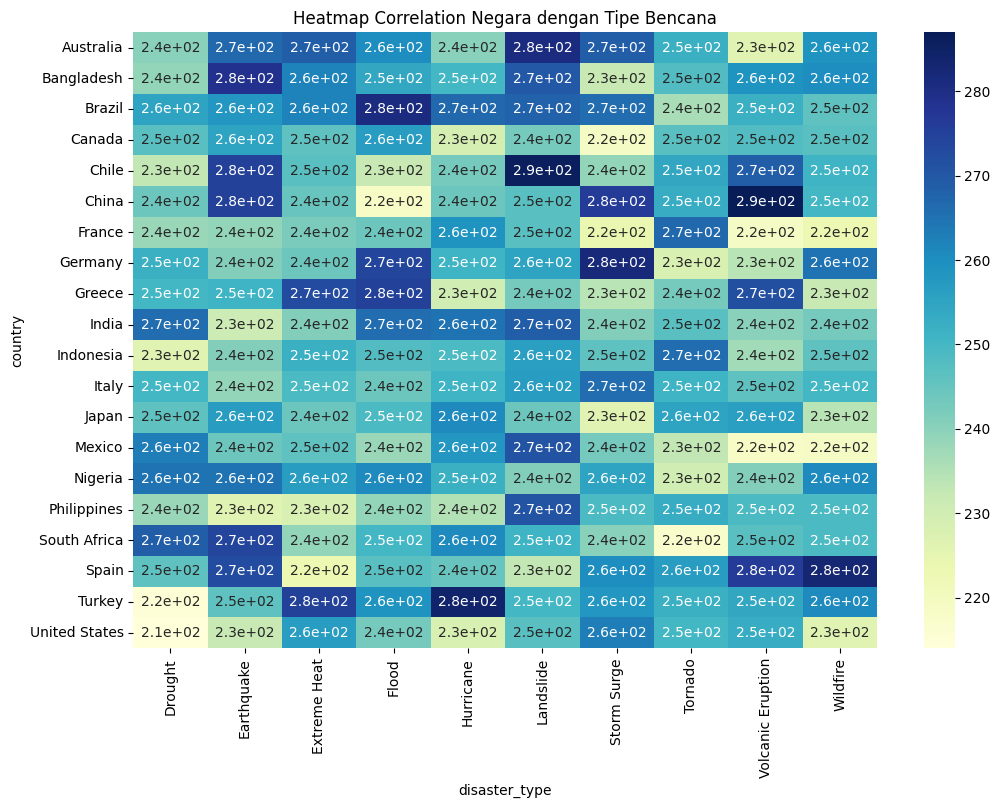

In [32]:
# Heatmap correlation Negara dengan tipe bencana
import seaborn as sns
correlation_matrix = data.pivot_table(index='country', columns='disaster_type', aggfunc='size', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Heatmap Correlation Negara dengan Tipe Bencana')
plt.show()

In [ ]:
# Prediksi jumlah korban berdasarkan Economic Loss + Tahun + Jenis Bencana + Negara (KNN)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Fitur dan target
X = data[['economic_loss_usd', 'year', 'disaster_type', 'country']]
y = data['casualties']

# Kolom numerik & kategorikal
numerical_features = ['economic_loss_usd', 'year']
categorical_features = ['disaster_type', 'country']

# Preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cari nilai K terbaik
k_values = range(1, 21)
errors = []

for k in k_values:
    model = Pipeline([
        ('preprocess', preprocess),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = np.mean((y_test - y_pred) ** 2)
    errors.append(mse)

# Visualisasi
plt.figure(figsize=(8,5))
plt.plot(k_values, errors, marker='o')
plt.xlabel('Nilai K')
plt.ylabel('Mean Squared Error')
plt.title('Pemilihan Nilai K Terbaik pada KNN')
plt.grid(True)
plt.show()
# Pilih K terbaik (misal K=5)
best_k = 5
model = Pipeline([
    ('preprocess', preprocess),
    ('knn', KNeighborsRegressor(n_neighbors=best_k))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluasi model
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error dengan K={best_k}: {mse}')
